<a href="https://colab.research.google.com/github/soyeunju/ESAA/blob/main/25-1/Assignments/0516_Week11_HM_DLWP_CNN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📊딥러닝 파이토치 교과서 ch 5

p.166~179

## 5.1 합성곱 신경망

* 역전파 과정은 복잡하고 많은 자원을 요구(CPU 혹은 GPU)하고 시간이 오래 걸린다는 단점이 있음.
* 합성곱 신경망은 이미지 전체를 한 번에 계산하는 것이 아닌 이미지 국소적 부분을 계산함으로써 시간과 자원을 절약하여 이미지의 세밀한 부분까지 분석할 수 있는 신경망.

### 5.1.1 합성곱층의 필요성
* 합성곱 신경망은 이미지나 영상을 처리하는 데 유용.
* 이미지 분석은 3 x 3 이미지를 펼처서(flattening) 각 픽셀에 가중치를 곱해서 은닉층에 전달. 하지만 이는 공간적 의미를 무시하는 것으로 이를 방지하고자 합성곱층 도입

### 5.1.2 합성곱 신경망(Convolutional Neural Network, CNN) 구조
* 입력층
* 합성곱층
* 풀링층
* 완전 연결층
* 출력층

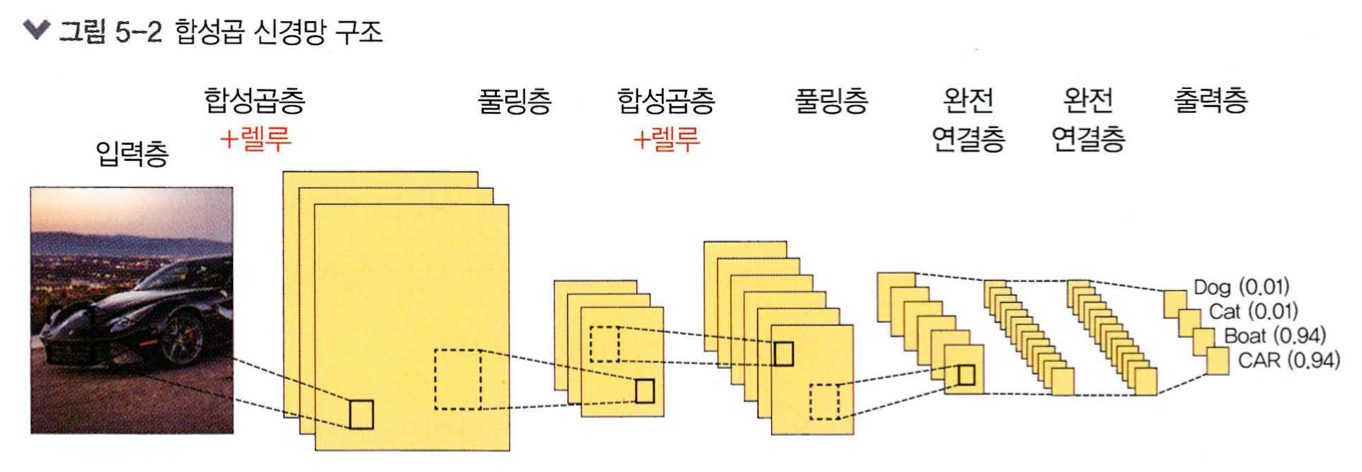

🔶 합성곱 신경망은 합성곱층과 풀링층을 거치면서 입력 이미지의 주요 특성 벡터(feature vector)를 추출. 그 후 추출된 주요 특성 벡터들은 완전 연결층을 거치면서 1차원 벡터로 변환되며, 마지막으로 출력층에서 활성화함수인 소프트맥스 함수를 사용하여 최종 결과 출력.

**입력층**
* 입력 이미지 데이터가 최초로 거치게 되는 계층.
* 이미지는 단순 1차원의 데이터가 아닌 높이 (height) 너비 (width) 채널(channel)의 값을 갖는 3차원 데이터.
  * 채널: 이미지가 그레이스케일(Gray Scale)이면 1, 컬러(RGB)면 3 값을 갖음
  * 아래와 같은 이미지 shape은 (4,4,3)
  
  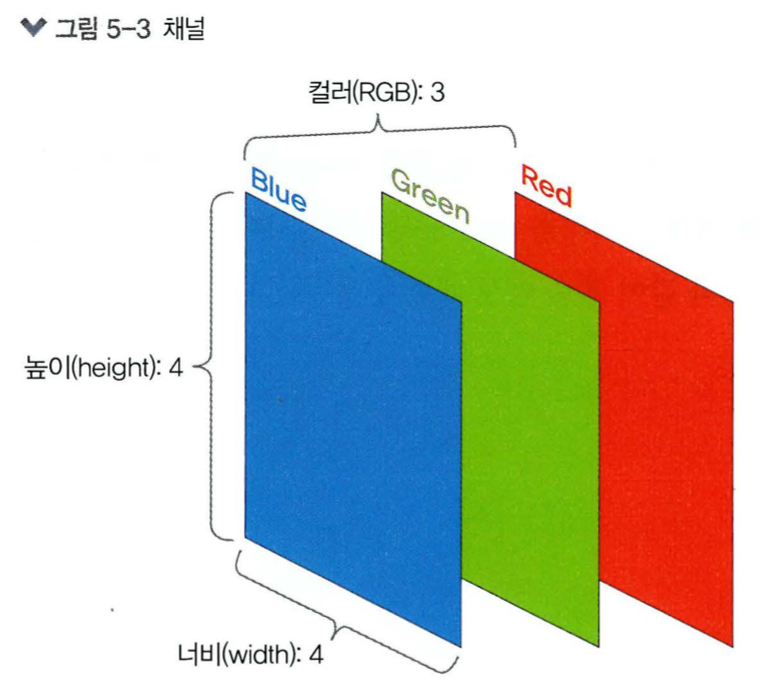


**합성곱층**
* 합성곱층(Convolution Layer)은 데이터에서 특성을 추출하는 역할을 수행
* 특성 추출을 위해서는 커널(kernel)이나 필터를 사용.
  * 커널/필터는 이미지의 모든 영역을 훌으면서 특성을 추출하게 되는데, 이렇게 추출된 결과물이 특성맵(feature map)
  * 커널은 3x3, 5x5 크기로 적용되는 것이 일반적이며, 스트라이드(stride)라는 지정된 간격에 따라 순차적으로 이동.
  * 커널은 스트라이드 간격만큼 순회하면서 모든 입력값과의 합성곱 연산으로 새로운 특성맵을 만들게 됨.
  * ex) 커널과 스트라이드의 상호 작용으로 원본 (6, 6, 1) 크기가 (4, 4, 1) 크기의 특성맵으로 줄어들게 됨.

    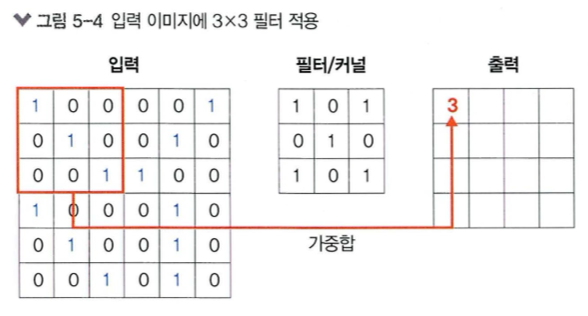
  * 컬러 이미지의 합성곱은 그레이스케일 이미지와 구분되는 특징이 있음. 첫째, 필터 채널이 3이라는 것과 둘째, RGB 각각에 서로 다른 기중치로 합성곱을 적용한 후 결과를 더해 준다는 것. 그 외 스트라이드 및 연산은 동일. 이때 필터의 개수는 3이 아닌 1.

    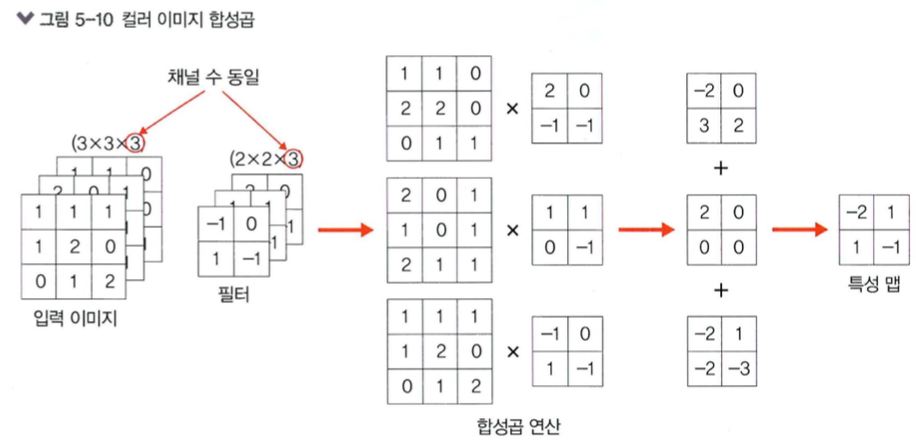

    * 필터가 두 개 이상인 합성곱의 경우 필터 각각은 특성 추출 결과의 채널

      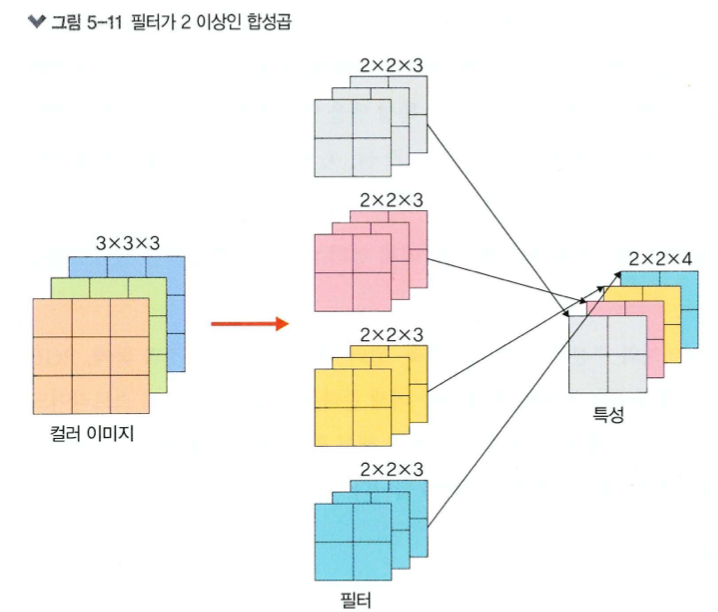

합성곱층을 요약하면 다음과 같음
* **입력 데이터**: $W_1 × H_1 × D_1(W_1:가로, H_1:세로 D_1:채널 또는 깊이)$
* **하이퍼파라미터**:
  * 필터 개수: $K$
  * 필터 크기: $F$
  * 스트라이드: $S$
  * 패딩: $P$
* **출력 데이터**:
  * $W_2 = (W_1-F+2P)/S+1$
  * $H_2 = (H_1-F+2P)/S+1$
  * $D_2 = K$

**풀링층**
* 풀링층(pooling layer)은 합성곱층과 유사하게 특성 맵의 차원을 다운 샘플링(sub-sampling: 이미지 축소)하여 연산량을 감소시
키고, 주요한 특성 벡터를 추출하여 학습을 효과적으로 할 수 있게 함.
  * 최대 풀링(max pooling): 대상 영역에서 최대값을 추출. 대부분 합성곱 신경망에서 쓰임.
  * 평균 풀링(average pooling): 대상 영역에서 평균값을 반환
  * 아래는 스트라이드 = 2로 한 최대 및 평균 풀링 예시.

    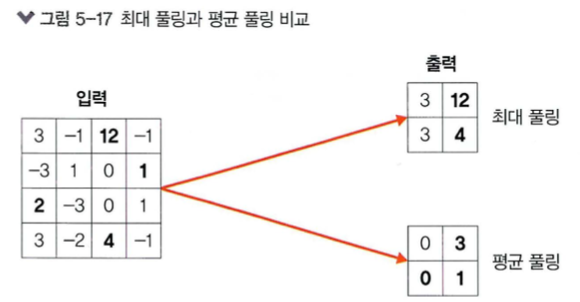

풀링을 요약하면 다음과 같음
* **입력 데이터**: $W_1 × H_1 × D_1(W_1:가로, H_1:세로 D_1:채널 또는 깊이)$
* **하이퍼파라미터**:
  * 필터 크기: $F$
  * 스트라이드: $S$
* **출력 데이터**:
  * $W_2 = (W_1-F)/S+1$
  * $H_2 = (H_1-F)/S+1$
  * $D_2 = D_1$

**완전 연결층**
* 합성곱층과 풀링층을 거치면서 차원이 축소된 특성 맵은 최종적으로 완전연결층(fully connected layer)으로 전달됨. 이 과정에서 이미지는 3차원 벡터에서 1차원 벡터로 펼쳐지게(flatten) 됨.

  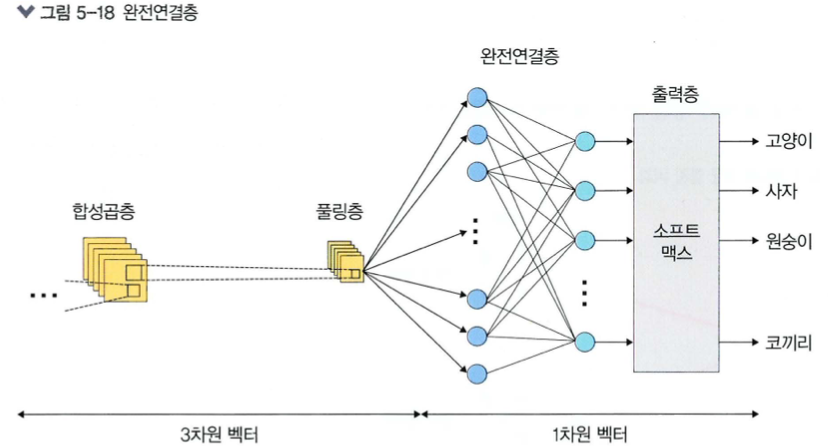

**출력층**
* 출력층(output layer)에서는 소프트맥스 활성화 함수가 사용되는데, 입력받은 값을 0~1 사이의 값 으로 출력함. 따라서 마지막 출력층의 소프트맥스 함수를 사용하여 이미지가 각 레이블(label)에 속할 확률값이 출력되며 이때 가장 높은 확률값을 갖는 레이블이 최종 값으로 선정.

### 5.1.3 1D, 2D, 3D 합성곱

합성곱은 이동하는 방향의 수와 출력 형태에 따라 1D, 2D, 3D로 분류할 수 있음

* **1D 합성곱**
* 1D 합성곱은 필터가 시간을 축으로 좌우로만 이동할 수 있는 합성곱.
* 예를 들어 입력이 [1, 1, 1, 1, 1]이고 펼터가 [0.25, 0.5, 0.25]라면， 출력은 [1, 1, 1]이 됨.
* 그래프 곡선을 완화할 때 사용.

  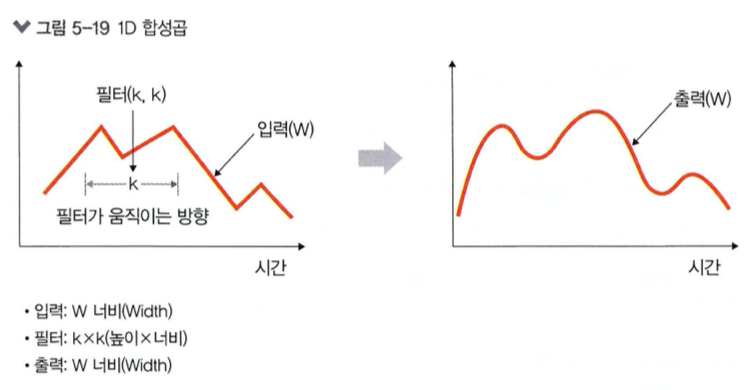


* **2D 합성곱**
* 2D 합성곱은 필터가 다음 그림과 같이 방향 두 개로 움직이는 형태
* 입력(W, H)과 필터(k,k)에 대한 출력은 (W,H)가 되며 출력 형태는 2D 행렬.

  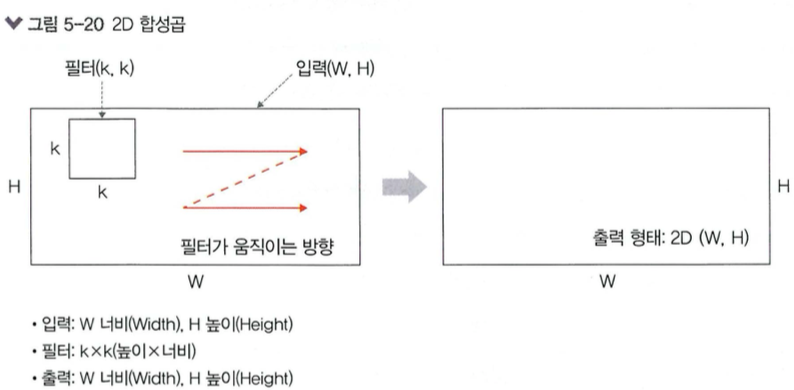

* **3D 합성곱**
* 3D 합성곱은 필터가 움직이는 방향이 아래 그림과 같이 세 개 있음. 입력(W, H, L)에 대해 필터(k, k,d)를 적용하면 출력으로(W,H,L)을 갖는 형태가 3D 합성곱.
* 이때 d < L을 유지하는 것이 중요

  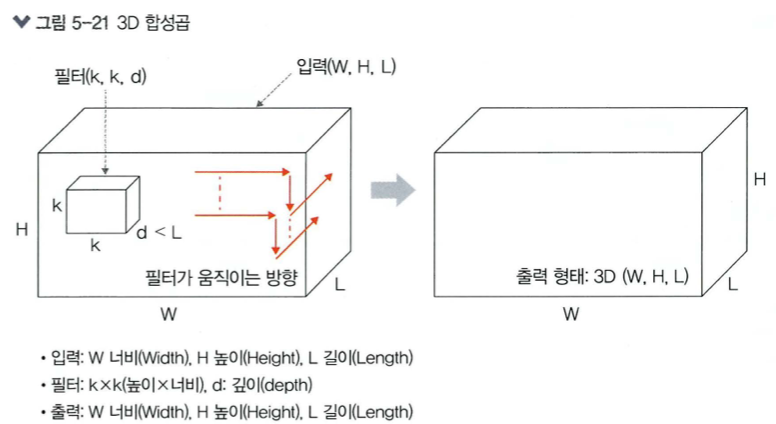

* **3D 입력을 갖는 2D 합성곱**
* 입력이 (224x224x3, 112x112x32)와 같은 3D 형태임에도 출력 형태가 3D가 아닌 2D 행렬을 취하는 것
* 필터에 대한 길이 (L)가 입력 채널의 길이 (L)와 같아야 함
* 입력(W, H, L)에 필터 (k,k,L)을 적용하면 출력은 (W, H), 출력 형태는 2D 행렬

  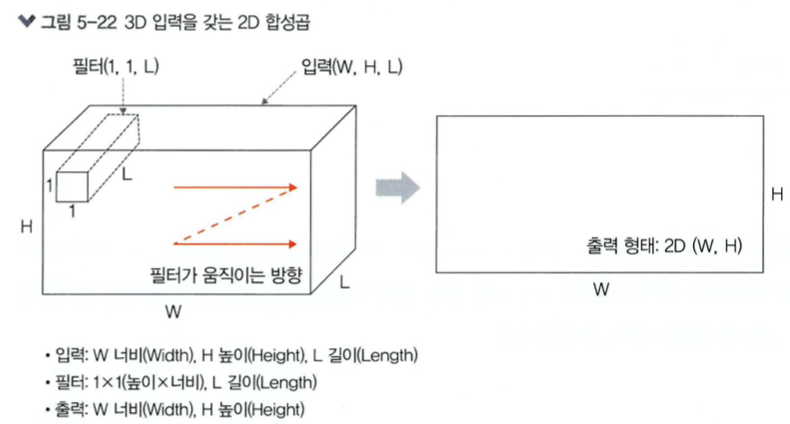

* **1X1 합성곱**
* 1X1 합성곱은 3D 형태로 입력
* 입력 (W,H,L)에 필터 (1,1,L)를 적용하면 출력은 (W,H)
* 채널 수를 조정해서 연산량이 감소되는 효과

  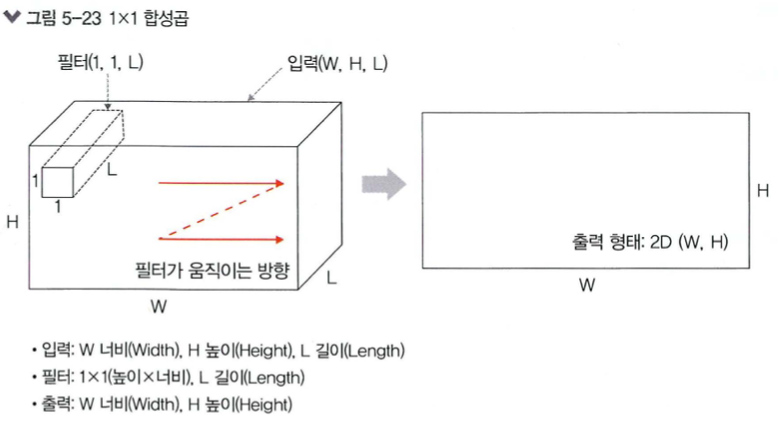